# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [67]:
import pandas as pd

In [68]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df
#methods have parentheses 

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Follow along with the live coding activity to see how this works.

In [69]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
sample_df["column 1"].loc[sample_df["column 2"] == 0]
#prints index and column 1 only

0    20
4    65
5    50
Name: column 1, dtype: int64

Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [70]:
sample_df["column 1"].loc[sample_df["column 2"] == 1]
#.loc is like a conditional, whatever goes before .loc is what is displayed

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [71]:
sample_df["column 2"].loc[sample_df["column 1"] == 50]

1    1
3    1
5    0
Name: column 2, dtype: int64

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [72]:
# You will need to import numpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpl 
%matplotlib inline

In [73]:
# You can use this function in your code to find the log of distance:

# np.log10()

### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [74]:
oh = pd.read_csv("oh_table.csv")
oh.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [75]:
distance = oh["distance"].loc[oh["group_id"] == 0]
G = oh["G"].loc[oh["group_id"] == 0]
J = oh["J"].loc[oh["group_id"] == 0]

In [86]:
mag = G - 5 * np.log10(distance) + 5
max(mag)

6.446881603165176

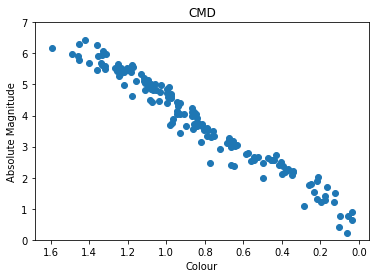

In [90]:
plt.scatter(G-J, mag) # This plots all our points as a scatterplot
plt.ylim([0, 7])
plt.xlabel('Colour')
plt.ylabel('Absolute Magnitude')
plt.title('CMD')
plt.gca().invert_xaxis() # This inverts the x axis so that the hottest stars are on the left.

In [113]:
##g = visible light
#j = infared

### Coding Challenge 1: Add the sun to your color magnitude diagram

In [ ]:
sun = oh[""]

### Coding Challenge 2: Add a colormap to your diagram

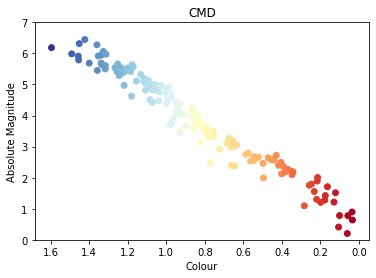

In [84]:
cm = plt.cm.get_cmap("RdYlBu")# This is the colormap we'll use for our data points. Note: _r reverses the colormap
plt.scatter(G-J, mag, c=G-J, s=35, cmap=cm) # This plots all our points as a scatterplot
plt.ylim([0, 7])
plt.xlabel('Colour')
plt.ylabel('Absolute Magnitude')
plt.title('CMD')
plt.gca().invert_xaxis() # This inverts the x axis so that the hottest stars are on the left.

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

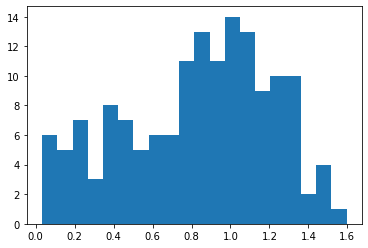

In [116]:
plt.hist(G-J, 20)
plt.show()

#plt.hist(dist,20 (-100,4000))

In [122]:
#np.random.seed(42)
#x = np.random.normal(size=1000)
#plt.hist(mag, density=True, bins=20) # `density=False` would make counts
#plt.ylabel('Absolute Magnitude')
#plt.xlabel('Colour');


#plt.hist(mag, edgecolor='black', linewidth=1.2)
